In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
columns_to_keep = ["LOCATION", "ISSUE_TIME", "ISSUING_AGENCY_NAME", "VIOLATION_PROCESS_DESC", "ACCIDENT_INDICATOR", "FINE_AMOUNT", "TOTAL_PAID"]

df = pd.read_csv("Moving_Violations_Issued_in_October_2024.csv",
                 usecols=columns_to_keep,
                 dtype={"FINE_AMOUNT": "float64", "TOTAL_PAID": "float64"},
                 low_memory=False)

df = df[df["ACCIDENT_INDICATOR"].isin(["Y", "N"])] #ONLY INCLUDE ROWS WHERE ACCIDENT INDICATOR IS PRESENT


In [3]:
# Count violations with and without accidents
violation_accident_counts = df.groupby(["VIOLATION_PROCESS_DESC", "ACCIDENT_INDICATOR"]).size().unstack()

# Fill missing values with 0
violation_accident_counts = violation_accident_counts.fillna(0)

# Calculate accident rate for each violation type
violation_accident_counts["Accident Rate (%)"] = (
    violation_accident_counts["Y"] / (violation_accident_counts["Y"] + violation_accident_counts["N"]) * 100
)

# Add a new column to count total violations for each violation type
violation_accident_counts["Total Violations"] = violation_accident_counts["Y"] + violation_accident_counts["N"]

# Filter out violations with a low total count (e.g., fewer than 3 total occurrences)
filtered_violation_accident_counts = violation_accident_counts[violation_accident_counts["Total Violations"] >= 3]

# Sort by highest accident rate, using the filtered version
filtered_violation_accident_counts = filtered_violation_accident_counts.sort_values("Accident Rate (%)", ascending=False)

print(filtered_violation_accident_counts.head(20))


ACCIDENT_INDICATOR                                    N     Y  \
VIOLATION_PROCESS_DESC                                          
RIGHT TURN ON RED FAIL YIELD PEDESTRIAN/VEHICLE     0.0   9.0   
INTERFERE WITH TRAFFIC WHEN PULLING FROM CURB       0.0   4.0   
COLLIDING WITH FIXED OBJECT W/NO DAMAGE OR INJURY   0.0   3.0   
COLLIDING WITH PEDESTRIAN                           0.0   8.0   
FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING    1.0  19.0   
FAIL TO YIELD TO ANOTHER  VEHICLE                   1.0  15.0   
FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE    24.0  86.0   
PASS WITHOUT CAUTION                                2.0   6.0   
BACK UP WITHOUT CAUTION                             1.0   3.0   
FOLLOW A VEHICLE TOO CLOSELY                        9.0  26.0   
FAIL TO YIELD RIGHT OF WAY                          9.0  20.0   
CHANGE LANES WITHOUT CAUTION                       10.0  12.0   
OPEN DOOR TO APPROACHING TRAFFIC                    3.0   3.0   
FAIL TO KEEP IN LANE     

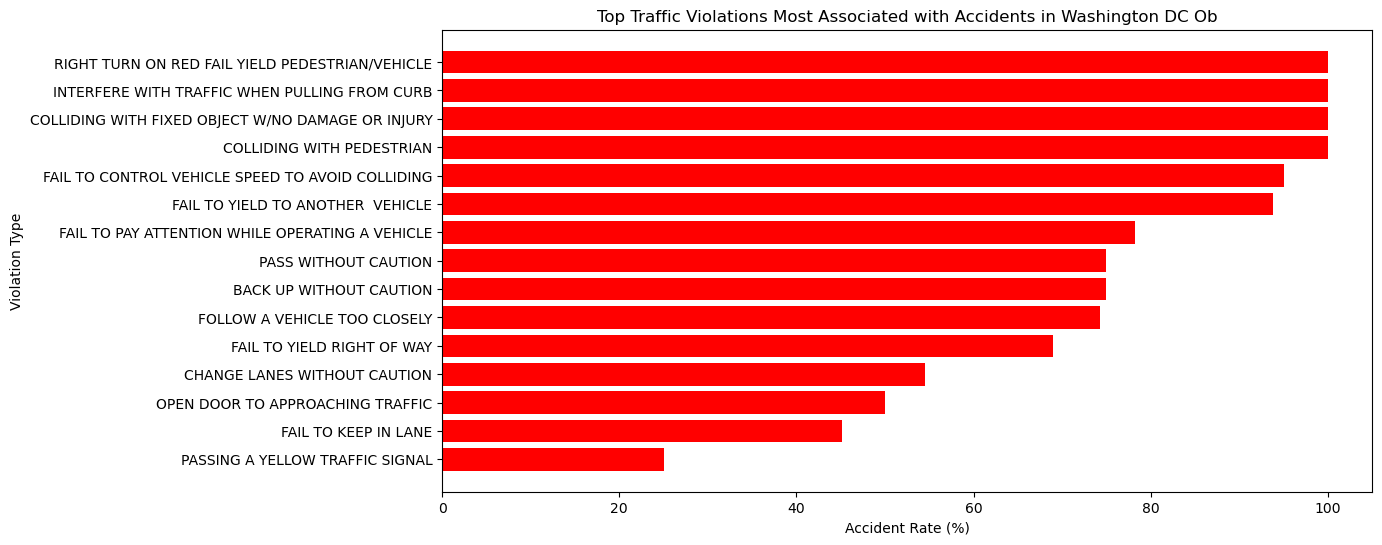

In [4]:
# Select top violations most associated with accidents (filtered)
top_violations_filtered = filtered_violation_accident_counts.head(15)

plt.figure(figsize=(12, 6))
plt.barh(top_violations_filtered.index, top_violations_filtered["Accident Rate (%)"], color='red')
plt.xlabel("Accident Rate (%)")
plt.ylabel("Violation Type")
plt.title("Top Traffic Violations Most Associated with Accidents in Washington DC Ob")
plt.gca().invert_yaxis()  # Reverse order for readability
plt.show()


In [5]:
excluded_violations = [
"COLLIDING WITH FIXED OBJECT W/NO DAMAGE OR INJURY",
"COLLIDING WITH PEDESTRIAN"
]
# Filter out those violations
filtered_violation_accident_counts = filtered_violation_accident_counts.loc[
    ~filtered_violation_accident_counts.index.isin(excluded_violations)
]

# Print nicely formatted table
print(filtered_violation_accident_counts.head(10).to_string(index=True, float_format="{:.2f}".format))

ACCIDENT_INDICATOR                                   N     Y  Accident Rate (%)  Total Violations
VIOLATION_PROCESS_DESC                                                                           
RIGHT TURN ON RED FAIL YIELD PEDESTRIAN/VEHICLE   0.00  9.00             100.00              9.00
INTERFERE WITH TRAFFIC WHEN PULLING FROM CURB     0.00  4.00             100.00              4.00
FAIL TO CONTROL VEHICLE SPEED TO AVOID COLLIDING  1.00 19.00              95.00             20.00
FAIL TO YIELD TO ANOTHER  VEHICLE                 1.00 15.00              93.75             16.00
FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE  24.00 86.00              78.18            110.00
PASS WITHOUT CAUTION                              2.00  6.00              75.00              8.00
BACK UP WITHOUT CAUTION                           1.00  3.00              75.00              4.00
FOLLOW A VEHICLE TOO CLOSELY                      9.00 26.00              74.29             35.00
FAIL TO YIELD RIGHT 